<a href="https://colab.research.google.com/github/jproctor-rebecca/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/LS_DS19_123_Confidence_Intervals_Assignment_RJProctor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy import stats
from scipy.stats import ttest_ind
import seaborn as sns
from numpy.random import RandomState

## Confidence Intervals

The following url can be used to access an abbreviated version of responses to Stack Overflow's 2018 Developer Survey. The original Survey had ~100k respondents but the data is quite dirty so I have selected a cleaner subset of it for you to use for your assignment.

<https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv>

The provided dataset holds 14 columns of information about individuals who make less than 500k per year and who responded that they had: 

"Participated in a full-time developer training program or bootcamp"

## Part 1 - Setting the Stage

**1) Load the dataset**

In [3]:
!wget https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv

--2020-08-12 18:55:01--  https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2499384 (2.4M) [text/plain]
Saving to: ‘bootcampers.csv’

bootcampers.csv     100%[===================>]   2.38M  14.8MB/s    in 0.2s    

2020-08-12 18:55:02 (14.8 MB/s) - ‘bootcampers.csv’ saved [2499384/2499384]



In [5]:
bootcampers = pd.read_csv('bootcampers.csv')

print(bootcampers.shape)
bootcampers

(2761, 15)


,Unnamed: 0,Student,Employment,UndergradMajor,DevType,YearsCoding,YearsCodingProf,ConvertedSalary,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,LanguageWorkedWith,Gender,Age,RaceEthnicity
0,62,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Data scientist or machine l...,12-14 years,6-8 years,120000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C;F#;Haskell;Python;Scala,Male,25 - 34 years old,White or of European descent
1,73,No,Employed full-time,"A humanities discipline (ex. literature, histo...",Back-end developer;Full-stack developer;System...,0-2 years,0-2 years,36000.0,Participated in a full-time developer training...,The official documentation and/or standards fo...,Four to six months,Java;JavaScript;SQL;HTML;CSS;Bash/Shell,Male,25 - 34 years old,White or of European descent
2,127,"Yes, full-time",Employed full-time,"A business discipline (ex. accounting, finance...",Full-stack developer,3-5 years,3-5 years,59980.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C#;JavaScript;TypeScript;HTML;CSS,Male,25 - 34 years old,East Asian
3,140,No,Employed full-time,"A social science (ex. anthropology, psychology...",Data scientist or machine learning specialist;...,9-11 years,3-5 years,70000.0,Taken an online course in programming or softw...,Questions & answers on Stack Overflow;Tapping ...,I haven’t gotten a developer job,JavaScript;Python;SQL;VBA,Male,25 - 34 years old,White or of European descent
4,153,No,Employed full-time,"Computer science, computer engineering, or sof...",Mobile developer,6-8 years,3-5 years,105000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C;Java;JavaScript;Objective-C;PHP;Python;Ruby;...,Male,25 - 34 years old,White or of European descent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2756,86961,No,"Not employed, and not looking for work","Computer science, computer engineering, or sof...","Back-end developer;C-suite executive (CEO, CTO...",9-11 years,9-11 years,180000.0,Taken an online course in programming or softw...,Questions & answers on Stack Overflow;Online d...,Four to six months,JavaScript;Python;Ruby;HTML;CSS;Bash/Shell,Male,25 - 34 years old,Middle Eastern
2757,87004,"Yes, full-time","Not employed, and not looking for work","Another engineering discipline (ex. civil, ele...",Full-stack developer;Student,3-5 years,0-2 years,36716.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C#;JavaScript;PHP;SQL;TypeScript;Delphi/Object...,Male,25 - 34 years old,White or of European descent
2758,87054,"Yes, part-time","Not employed, but looking for work","Information systems, information technology, o...",Back-end developer;Data or business analyst;Da...,0-2 years,3-5 years,2904.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,Less than a month,C++;Java;JavaScript;PHP;Python;SQL;HTML;CSS,Male,18 - 24 years old,Hispanic or Latino/Latina
2759,87070,No,"Not employed, but looking for work","A health science (ex. nursing, pharmacy, radio...",Mobile developer,0-2 years,0-2 years,60000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,Six months to a year,C;C#;Objective-C;Swift,Male,18 - 24 years old,Black or of African descent


In [6]:
bootcampers.describe()

,Unnamed: 0,ConvertedSalary
count,2761.000000,2761.000000
mean,41208.962332,73453.404201
std,23947.027421,57710.453235
min,62.000000,0.000000
25%,20096.000000,32628.000000
50%,40573.000000,65340.000000
75%,62085.000000,100000.000000
max,87131.000000,499344.000000


In [7]:
bootcampers.describe(exclude='number')

,Student,Employment,UndergradMajor,DevType,YearsCoding,YearsCodingProf,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,LanguageWorkedWith,Gender,Age,RaceEthnicity
count,2761,2761,2761,2761,2761,2761,2761,2761,2761,2761,2761,2761,2761
unique,3,6,12,937,11,11,124,277,8,1771,10,7,33
top,No,Employed full-time,"Computer science, computer engineering, or sof...",Full-stack developer,3-5 years,3-5 years,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C#;JavaScript;SQL;HTML;CSS,Male,25 - 34 years old,White or of European descent
freq,2371,2386,1527,251,526,678,140,134,1495,62,2494,1399,1930


In [8]:
bootcampers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2761 entries, 0 to 2760
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2761 non-null   int64  
 1   Student             2761 non-null   object 
 2   Employment          2761 non-null   object 
 3   UndergradMajor      2761 non-null   object 
 4   DevType             2761 non-null   object 
 5   YearsCoding         2761 non-null   object 
 6   YearsCodingProf     2761 non-null   object 
 7   ConvertedSalary     2761 non-null   float64
 8   EducationTypes      2761 non-null   object 
 9   SelfTaughtTypes     2761 non-null   object 
 10  TimeAfterBootcamp   2761 non-null   object 
 11  LanguageWorkedWith  2761 non-null   object 
 12  Gender              2761 non-null   object 
 13  Age                 2761 non-null   object 
 14  RaceEthnicity       2761 non-null   object 
dtypes: float64(1), int64(1), object(13)
memory usage: 323.7

**2) Select two random samples from this dataset, one with a sample size of 20 and the other with a sample size of 200. (Use a `random_state` of `42` when selecting the samples)**

In [9]:
# small sample mean to build a confidence interval around:
bootcampers_small = bootcampers.sample(20, random_state=42)
bootcampers_small

,Unnamed: 0,Student,Employment,UndergradMajor,DevType,YearsCoding,YearsCodingProf,ConvertedSalary,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,LanguageWorkedWith,Gender,Age,RaceEthnicity
367,11175,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Data or business analyst;Da...,0-2 years,0-2 years,74500.0,Taken an online course in programming or softw...,Questions & answers on Stack Overflow;Online d...,I already had a full-time job as a developer w...,JavaScript;PHP;Python;SQL;HTML;CSS;Bash/Shell,Male,25 - 34 years old,"Native American, Pacific Islander, or Indigeno..."
2759,87070,No,"Not employed, but looking for work","A health science (ex. nursing, pharmacy, radio...",Mobile developer,0-2 years,0-2 years,60000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,Six months to a year,C;C#;Objective-C;Swift,Male,18 - 24 years old,Black or of African descent
1330,39067,No,Employed full-time,"Information systems, information technology, o...",Back-end developer;DevOps specialist;Front-end...,3-5 years,3-5 years,86120.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C#;Java;JavaScript;SQL;TypeScript;HTML;CSS,Male,25 - 34 years old,White or of European descent
2750,86288,No,"Not employed, but looking for work","A social science (ex. anthropology, psychology...",Front-end developer;Full-stack developer,3-5 years,3-5 years,60000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,Longer than a year,CoffeeScript;JavaScript;PHP;Python;SQL;TypeScr...,Male,25 - 34 years old,White or of European descent
521,15370,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Front-end developer;Full-st...,9-11 years,6-8 years,25047.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,Four to six months,C#;Java;JavaScript;PHP;SQL;HTML;CSS,Male,25 - 34 years old,East Asian;Middle Eastern
819,24076,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Full-stack developer,6-8 years,3-5 years,10704.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,JavaScript;PHP;SQL;TypeScript;Visual Basic 6;D...,Male,25 - 34 years old,East Asian
322,10007,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Data scientist or machine l...,27-29 years,27-29 years,150000.0,Taken an online course in programming or softw...,"A book or e-book from O’Reilly, Apress, or a s...",I already had a full-time job as a developer w...,C;C#;Java;JavaScript;SQL;Delphi/Object Pascal;...,Male,45 - 54 years old,White or of European descent
1970,59204,No,Employed full-time,"Another engineering discipline (ex. civil, ele...",Back-end developer;Front-end developer,3-5 years,0-2 years,41124.0,Participated in a full-time developer training...,The official documentation and/or standards fo...,Immediately after graduating,JavaScript;SQL;CSS,Female,25 - 34 years old,White or of European descent
365,11142,No,Employed full-time,"A business discipline (ex. accounting, finance...",Full-stack developer,3-5 years,3-5 years,135000.0,Participated in a full-time developer training...,The official documentation and/or standards fo...,One to three months,JavaScript;Python;SQL;TypeScript;VBA;HTML;CSS,Male,25 - 34 years old,White or of European descent
2512,74863,No,"Independent contractor, freelancer, or self-em...","Computer science, computer engineering, or sof...","Back-end developer;C-suite executive (CEO, CTO...",18-20 years,15-17 years,62600.0,Participated in a full-time developer training...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C#;Java;JavaScript;PHP;Python;

In [11]:
# large sample mean to build a confidence interval around:
bootcampers_large = bootcampers.sample(200, random_state=42)
bootcampers_large

,Unnamed: 0,Student,Employment,UndergradMajor,DevType,YearsCoding,YearsCodingProf,ConvertedSalary,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,LanguageWorkedWith,Gender,Age,RaceEthnicity
367,11175,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Data or business analyst;Da...,0-2 years,0-2 years,74500.0,Taken an online course in programming or softw...,Questions & answers on Stack Overflow;Online d...,I already had a full-time job as a developer w...,JavaScript;PHP;Python;SQL;HTML;CSS;Bash/Shell,Male,25 - 34 years old,"Native American, Pacific Islander, or Indigeno..."
2759,87070,No,"Not employed, but looking for work","A health science (ex. nursing, pharmacy, radio...",Mobile developer,0-2 years,0-2 years,60000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,Six months to a year,C;C#;Objective-C;Swift,Male,18 - 24 years old,Black or of African descent
1330,39067,No,Employed full-time,"Information systems, information technology, o...",Back-end developer;DevOps specialist;Front-end...,3-5 years,3-5 years,86120.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C#;Java;JavaScript;SQL;TypeScript;HTML;CSS,Male,25 - 34 years old,White or of European descent
2750,86288,No,"Not employed, but looking for work","A social science (ex. anthropology, psychology...",Front-end developer;Full-stack developer,3-5 years,3-5 years,60000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,Longer than a year,CoffeeScript;JavaScript;PHP;Python;SQL;TypeScr...,Male,25 - 34 years old,White or of European descent
521,15370,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Front-end developer;Full-st...,9-11 years,6-8 years,25047.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,Four to six months,C#;Java;JavaScript;PHP;SQL;HTML;CSS,Male,25 - 34 years old,East Asian;Middle Eastern
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1336,39183,No,Employed full-time,"Computer science, computer engineering, or sof...",Designer;Desktop or enterprise applications de...,6-8 years,6-8 years,11748.0,Taken an online course in programming or softw...,"A book or e-book from O’Reilly, Apress, or a s...",I already had a full-time job as a developer w...,C#;JavaScript;SQL;HTML;CSS,Male,25 - 34 years old,White or of European descent
1951,58736,"Yes, full-time",Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Desktop or enterprise appli...,21-23 years,9-11 years,46573.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,Assembly;C;C++;C#;Clojure;Haskell;Python;Rust;...,Male,25 - 34 years old,White or of European descent
2687,81659,No,"Not employed, but looking for work",Fine arts or performing arts (ex. graphic desi...,Designer;Front-end developer,0-2 years,0-2 years,20616.0,Participated in a full-time developer training...,The official documentation and/or standards fo...,I haven’t gotten a developer job,JavaScript;PHP;HTML;CSS,Female,25 - 34 years old,White or of European descent
2442,72394,No,Employed full-time,"Computer science, computer engineering, or sof...",Full-stack developer,3-5 years,0-2 years,9672.0,Taken an online course in programming or softw...,Questions & answers on Stack Overflow;Online d...,Four to six months,JavaScript;SQL;HTML;CSS,Male,18 - 24 years old,Hispanic or Latino/Latina


**3) Calculate and report the sample means of the `ConvertedSalary` column for both of the samples.**

In [10]:
# This is our POINT ESTIMATE, small sample
bootcampers_small['ConvertedSalary'].mean()

55752.2

In [12]:
# This is our POINT ESTIMATE, large sample
bootcampers_large['ConvertedSalary'].mean()

68551.255

**4) Both of these sample means are estimates of an underlying population value. Which sample mean do you trust more? Why? Would a non-technical audience have any idea about which of these values is more trustworthy?**

As the sample size increases, the standard deviation of the means decreases; and as the sample size decreases, the standard deviation of the sample means increases.  Therefor the sample mean of the large sample is more likely to represent the population mean and is considered more trustworthy.  

A non-technical audience may not understand that a sample size that is too small reduces the power of a study and increases the margin of error, which can render the analysis meaningless. A non-technical decision maker may be compelled to limit the sampling size for economic and other reasons.  Communicating these technical differences is an essential part of the data scientists skillset and value.

**5) Does just the point estimate (individual value of the sample mean) indicate to you anything about how much sampling error there could be with these estimates?**

A point estimate of a population parameter is a single value of a statistic.  However, it does NOT indicate anything about sampling error.  

In a confidence interval, the range of values above and below the sample statistic is called the margin of error.  The confidence level describes the likelihood that a particular sampling method will produce a confidence interval that includes the true population parameter.



**6) What strategies could we use when reporting these numbers to not only report our estimates but also to give non-technical readers an idea about how far off our estimates might be due to sampling error?**



blog/report with graphs/interactive models (include description of methedology and the why behind it - impact to audience & their decision making process - in plain English)

Graphs can be invaluable, allowing data analysts to provide a visual interpretation of complex numerical stories. Graphs also help to overcome the barriar of technical language. A graph can "show" a non-numerical thinker the complex relationships between variables and help them understand it in ways that "telling" does not.


## Part 2 - Reporting CIs / MOEs along with our point estimates for more context.

**1) Calculate and report a 95% confidence interval around both of the sample means from part 1.**



In [17]:
# by default np.std() calculates the POPULATION standard deviation, 
# and not the SAMPLE standard deviation

print("Population Standard Deviation", np.std(bootcampers_small['ConvertedSalary'], ddof=0))


# If I want the sample standard deviation:
print("Sample Standard Deviation, Small", np.std(bootcampers_small['ConvertedSalary'], ddof=1))


Population Standard Deviation 41541.50996846407
Sample Standard Deviation, Small 42620.68994057377


In [18]:
# by default np.std() calculates the POPULATION standard deviation, 
# and not the SAMPLE standard deviation

print("Population Standard Deviation", np.std(bootcampers_large['ConvertedSalary'], ddof=0))


# If I want the sample standard deviation:
print("Sample Standard Deviation, Large", np.std(bootcampers_large['ConvertedSalary'], ddof=1))

Population Standard Deviation 56930.348151930135
Sample Standard Deviation, Large 57073.2099779389


In [81]:
# random sample of size 20
# with 95% confidence, the true population value is within
# the upper and lower bounds of the Confidence Interval

confidence_interval(bootcampers_small['ConvertedSalary'], confidence_level=0.95)

(35805.10309625536, 55752.2, 75699.29690374463, 19947.096903744638)

In [23]:
# random sample of size 200
# with 95% confidence, the true population value is within
# the upper and lower bounds of the Confidence Interval

confidence_interval(bootcampers_large['ConvertedSalary'], confidence_level=0.95)

(60593.058804479086, 68551.255, 76509.45119552092, 7958.196195520917)

**2) Which confidence interval is wider and why?**

The confidence interval of the first sample is much wider. Due to its lower sample size the standard error of our estimate is much larger causing the potential distribution of sample means to be much more spread out. A confidence interval catches 95% of this theoretical distriution of sample means so if our standard error is larger, our confidence interval will be wider as well.

**3) Report the mean and the margin of error for both of the sample means. What does the Margin of Error Represent?**

The margin of error gives an idea of how far off our estimates might be (with 95% confidence). We're trying to supply a plausible range for our parameter of interest (the true average salary of bootcamp grads).

In [19]:
# code combined to return sample mean, CI, and moe

def confidence_interval(bootcampers_small, confidence_level=.95):
  
  # Turn this into a numpy array for consistency
  data = np.array(bootcampers_small)
  
  # Sample Standard Deviation (ddof=1) with numpy to get sample metrics
  s = np.std(data, ddof=1)
  n = data.shape[0]
  x_bar = np.mean(data)
  
  # Look up the t statistic that corresponds to our sample size *and* confidence level
  t = stats.t.ppf(1 - ((1 - confidence_level) / 2), n-1)
  # Standard Error
  std_err = (s / np.sqrt(n))
  # Margin of Error
  moe = t*std_err

  lower_bound = x_bar - moe
  upper_bound = x_bar + moe

  return (lower_bound, x_bar, upper_bound, moe)

In [79]:
# random sample of size 20
# with 95% confidence, the true population value is within
# the upper and lower bounds of the Confidence Interval

confidence_interval(bootcampers_small['ConvertedSalary'], confidence_level=0.95)

(35805.10309625536, 55752.2, 75699.29690374463, 19947.096903744638)

In [78]:
# random sample of size 200
# with 95% confidence, the true population value is within
# the upper and lower bounds of the Confidence Interval

confidence_interval(bootcampers_large['ConvertedSalary'], confidence_level=0.95)

(60593.058804479086, 68551.255, 76509.45119552092, 7958.196195520917)

## Part 3 - Communicate the Precision of Sample Estimates Graphically

**1) Create a plot using `plt.errorbar` that compares both of the confidence intervals.** 

In [25]:
# confidence interval 1
CI1 = confidence_interval(bootcampers_small['ConvertedSalary'], confidence_level=0.95)
CI1

(35805.10309625536, 55752.2, 75699.29690374463, 19947.096903744638)

In [77]:
# confidence interval 2
CI2 = confidence_interval(bootcampers_large['ConvertedSalary'], confidence_level=0.95)
CI2

(60593.058804479086, 68551.255, 76509.45119552092, 7958.196195520917)

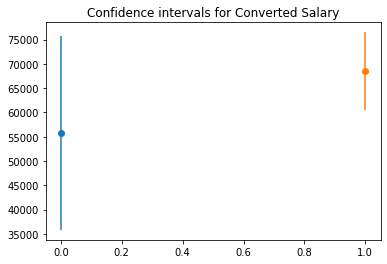

In [27]:
# plot confidence intervals - errorbar
plt.errorbar(0, CI1[1], yerr=CI1[3], fmt='o')
plt.errorbar(1, CI2[1], yerr=CI2[3], fmt='o')
plt.title('Confidence intervals for Converted Salary')
plt.show()

**2) Create a plot using `plt.bar` that compares both of the confidence intervals.**

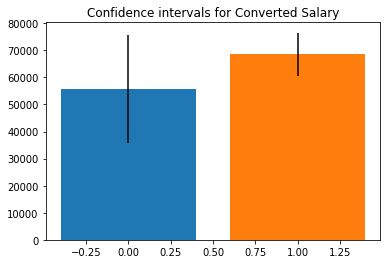

In [32]:
## plot confidence intervals - bar
plt.bar(0, height=CI1[1], yerr=CI1[3])
plt.bar(1, height=CI2[1], yerr=CI2[3])
plt.title('Confidence intervals for Converted Salary')
plt.show()

## Part 4 - Check for Understanding







**Calculate a Confidence Interval using the entire dataset. How precise do our estimates get?**

In [76]:
# confidence interval 1
CI3 = confidence_interval(bootcampers['ConvertedSalary'], confidence_level=0.95)
CI3

(71299.82986224785, 73453.40420137631, 75606.97854050477, 2153.574339128457)

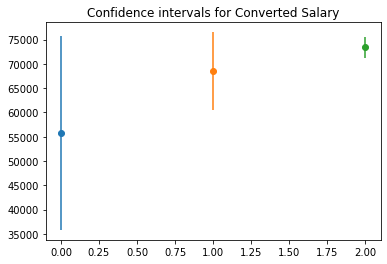

In [39]:
# plot confidence intervals - errorbar
plt.errorbar(0, CI1[1], yerr=CI1[3], fmt='o')
plt.errorbar(1, CI2[1], yerr=CI2[3], fmt='o')
plt.errorbar(2, CI3[1], yerr=CI3[3], fmt='o')
plt.title('Confidence intervals for Converted Salary')
plt.show()

In [ ]:
# the large sample was much closer to accurately representing the population 
# data than the small sample; the larger sample's confidence intervals are also 
# more precise/more narrow/closer in measurement to one another

**What does "precision" mean in the context of statistical estimates and how is that different from "accuracy?"**

In measurement of a set, accuracy is closeness of the measurements to a specific value, while precision is the closeness of the measurements to each other.  Accuracy is a description of systematic errors, a measure of statistical bias; low accuracy causes a difference between a result and a "true" value.  

In our case, we would state that the small confidence intervals are statistically less accurate than the large sample confidence intervals because their distance from the true value of the confidence intervals of the population is so much greater than the larger sample confidence intervals.

In our case, we would state that the large sample confidence intervals are more precise than the small sample confidence intervals because the measurement displacement is more narrow(they are closer together).

**It is very common to misunderstand what is captured by a 95% confidence interval. What is the correct interpretation? ([Hint](https://www.statisticssolutions.com/misconceptions-about-confidence-intervals/))**

When we say we hare a 95% confidence interval we are saying that the true population parameter is between the lower and upper calculated values. A 95% CI for a population parameter DOES NOT mean that the interval has a probability of 0.95 that the true value of the parameter falls in the interval.

If repeated samples were taken and the 95% confidence interval was computed for each sample, 95% of the intervals would contain the population mean. A 95% confidence interval has a 0.95 probability of containing the population mean. 95% of the population distribution is contained in the confidence interval.

# Stretch Goals:

1) Study the relationship between t-tests and confidence intervals.
 - Find a sample mean that we have worked with and construct a 95% confidence interval around it. (find the lower and upper bounds)
 - Run a 1-sample t-test with the null hypothesis value being just barely **outside** of the confidence interval. What is the p-value?
 - Run a 1-sample t-test with the null hypothesis value being just barely **inside** of the confidence interval. What is the p-value?

  What does it mean when we say that the boundaries of the confidence interval are the boundaries of statistical significance in a 1-sample t-test?


2) Go back to our [congressional voting dataset](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records) and build confidence intervals around the means of all of the issues for a single party. Compare all of those confidence intervals graphically on a single graph. 

3) Dive deeper into the [2018 Stack Overflow Survey](https://www.kaggle.com/stackoverflow/stack-overflow-2018-developer-survey) results to see what cool things you can find.

In [ ]:
###study the relationship between t-tests and confidence intervals###

In [69]:
# grab the file from UCI
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data


--2020-08-12 22:15:10--  https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25936 (25K) [application/x-httpd-php]
Saving to: ‘imports-85.data.1’

imports-85.data.1   100%[===================>]  25.33K  --.-KB/s    in 0.07s   

2020-08-12 22:15:10 (379 KB/s) - ‘imports-85.data.1’ saved [25936/25936]



In [70]:

column_headers = ['symboling', 'normalized-losses', 'make', 'fuel-type', 
                  'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 
                  'engine-location', 'wheel-base', 'length', 'width', 'height', 
                  'curb-weight', 'engine-type', 'num-of-cylinders', 
                  'engine-size', 'fuel-system', 'bore', 'stroke', 
                  'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 
                  'highway-mpg', 'price']
               
# add column headers and replace '?' with NaN values
cars = pd.read_csv('imports-85.data', names=column_headers, na_values="?")


cars

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [71]:
# small sample of cars data set
sample_small = cars.sample(10, random_state=30)

sample_small

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
121,1,154.0,plymouth,gas,std,four,sedan,fwd,front,93.7,167.3,63.8,50.8,1989,ohc,four,90,2bbl,2.97,3.23,9.4,68.0,5500.0,31,38,6692.0
176,-1,65.0,toyota,gas,std,four,sedan,fwd,front,102.4,175.6,66.5,54.9,2414,ohc,four,122,mpfi,3.31,3.54,8.7,92.0,4200.0,27,32,10898.0
24,1,148.0,dodge,gas,std,four,hatchback,fwd,front,93.7,157.3,63.8,50.6,1967,ohc,four,90,2bbl,2.97,3.23,9.4,68.0,5500.0,31,38,6229.0
88,-1,137.0,mitsubishi,gas,std,four,sedan,fwd,front,96.3,172.4,65.4,51.6,2403,ohc,four,110,spdi,3.17,3.46,7.5,116.0,5500.0,23,30,9279.0
72,3,142.0,mercedes-benz,gas,std,two,convertible,rwd,front,96.6,180.3,70.5,50.8,3685,ohcv,eight,234,mpfi,3.46,3.10,8.3,155.0,4750.0,16,18,35056.0
103,0,108.0,nissan,gas,std,four,sedan,fwd,front,100.4,184.6,66.5,55.1,3060,ohcv,six,181,mpfi,3.43,3.27,9.0,152.0,5200.0,19,25,13499.0
26,1,148.0,dodge,gas,std,four,sedan,fwd,front,93.7,157.3,63.8,50.6,1989,ohc,four,90,2bbl,2.97,3.23,9.4,68.0,5500.0,31,38,7609.0
20,0,81.0,chevrolet,gas,std,four,sedan,fwd,front,94.5,158.8,63.6,52.0,1909,ohc,four,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,6575.0
155,0,91.0,toyota,gas,std,four,wagon,4wd,front,95.7,169.7,63.6,59.1,3110,ohc,four,92,2bbl,3.05,3.03,9.0,62.0,4800.0,27,32,8778.0
185,2,94.0,volkswagen,gas,std,four,sedan,fwd,front,97.3,171.7,65.5,55.7,2212,ohc,four,109,mpfi,3.19,3.40,9.0,85.0,5250.0,27,34,8195.0


In [72]:
# find mean of specific column of whole population
cars['highway-mpg'].mean()

30.75121951219512

In [73]:
# find mean of specific column of small population sample
sample_small['highway-mpg'].mean()

32.8

t-Test: Highway-mpg (small batch, size=10)

1) Null Hypothesis:

Cars sold from the sample population have the same average highway fuel efficiency as cars in the whole population: x¯¯¯==μ

2) Alternative Hypothesis:

Cars sold from the sample population have a statistically significant differing average of highway fuel efficiency of cars in the whole population: x¯¯¯≠μ

3) Confidence Level: 95%

In [75]:
# complete t-test on specific column mean of small population
stats.ttest_1samp(sample_small['highway-mpg'], 30.75)

Ttest_1sampResult(statistic=0.8917727404948264, pvalue=0.3957307423595724)

In [74]:
# complete confidence interval 
confidence_interval(sample_small['highway-mpg'], confidence_level=0.95)


(27.599771317246343, 32.8, 38.00022868275365, 5.200228682753654)

4) Conclusion: Based on a t-statistic of 0.891, and a p-value of 0.395, (reject/***fail to reject*** ) the null hypothesis that the cars sold from the sample population have the same average highway fuel efficiency as cars in the whole population.

(T-test 1 sample: FtR p>0.05)

In [ ]:
###Congressional voting set-Compare confidence intervals on 1 graph###

In [41]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

column_headers = ['party','handicapped-infants','water-project',
                  'budget','physician-fee-freeze', 'el-salvador-aid',
                  'religious-groups','anti-satellite-ban',
                  'aid-to-contras','mx-missile','immigration',
                  'synfuels', 'education', 'right-to-sue','crime','duty-free',
                  'south-africa']

df = pd.read_csv('house-votes-84.data', names=column_headers)

df = df.replace({'y': 1, 'n': 0, "?": np.NaN})

rep = df[df['party'] == 'republican']
dem = df[df['party'] == 'democrat']

print(df.shape)
df.head()

--2020-08-12 21:49:22--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.06s   

2020-08-12 21:49:23 (278 KB/s) - ‘house-votes-84.data’ saved [18171/18171]

(435, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [42]:
dem['religious-groups'].mean()

0.47674418604651164

In [43]:
rep['religious-groups'].mean()

0.8975903614457831

In [44]:
# remove NaNs first

cleaned_sample = dem['religious-groups'].dropna()

dem_ci = confidence_interval(cleaned_sample)

dem_ci

(0.41539182663748236,
 0.47674418604651164,
 0.5380965454555409,
 0.06135235940902927)

In [45]:
cleaned_sample = rep['religious-groups'].dropna()

rep_ci = confidence_interval(cleaned_sample)

rep_ci

(0.850987486003394,
 0.8975903614457831,
 0.9441932368881721,
 0.046602875442389065)

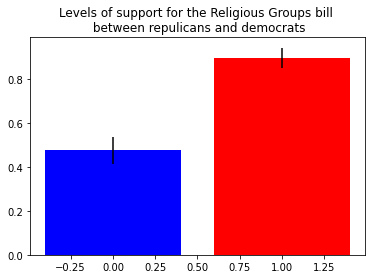

In [46]:
plt.bar(x=0, height=dem_ci[1], yerr=dem_ci[3], color='blue')
plt.bar(x=1, height=rep_ci[1], yerr=rep_ci[3], color='red')
plt.title("Levels of support for the Religious Groups bill \n between repulicans and democrats")
plt.show()

In [49]:
# a list of tuples is really easy to turn into a dataframe
confidence_intervals = [rep_ci, dem_ci]
df = pd.DataFrame(confidence_intervals)
df.columns = ['lower', 'mean', 'upper', 'moe']
df

,lower,mean,upper,moe
0,0.850987,0.897590,0.944193,0.046603
1,0.415392,0.476744,0.538097,0.061352


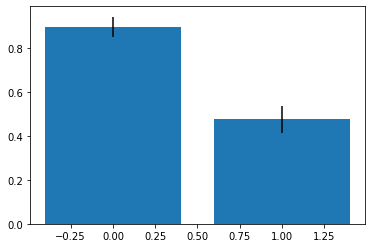

In [50]:
plt.bar(x=range(0, df.shape[0]), height=df['mean'], yerr=df['moe'])
plt.show()

In [67]:
rep_ci_all = []
for col in rep.columns.to_list()[1:]:
  cleaned_sample = rep[col].dropna()
  rep_ci_all.append(tuple[confidence_interval(cleaned_sample)])
  print(rep_ci_all)

# If I add these to a list, and then use the list of tuples to create a dataframe
# then it would be really easy to plot all of these confidence intervals
# on a single graph. 

TypeError: ignored

In [56]:

CI_df = pd.DataFrame(rep_ci_all)

CI_df

SyntaxError: ignored

In [ ]:
###Dive Deeper 2018 Stack Overflow Survey###

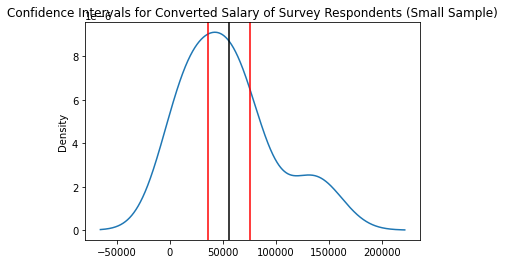

In [33]:
# The confidence interval DOES NOT capture 95% of the data from the sample
# The confidence interval captures 95% of Sample Means 
# (potential locations for the population value)

bootcampers_small['ConvertedSalary'].plot.density()
plt.title('Confidence Intervals for Converted Salary of Survey Respondents (Small Sample)')
plt.axvline(x=CI1[0], color='red')
plt.axvline(x=CI1[1], color='black')
plt.axvline(x=CI1[2], color='red')
plt.show()

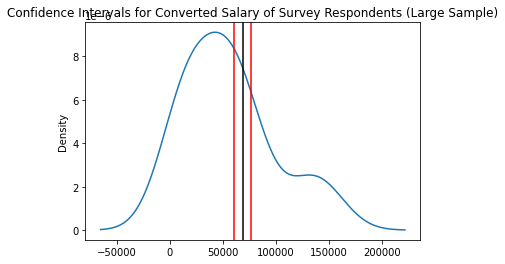

In [34]:
# The confidence interval DOES NOT capture 95% of the data from the sample
# The confidence interval captures 95% of Sample Means 
# (potential locations for the population value)

bootcampers_small['ConvertedSalary'].plot.density()
plt.title('Confidence Intervals for Converted Salary of Survey Respondents (Large Sample)')
plt.axvline(x=CI2[0], color='red')
plt.axvline(x=CI2[1], color='black')
plt.axvline(x=CI2[2], color='red')
plt.show()

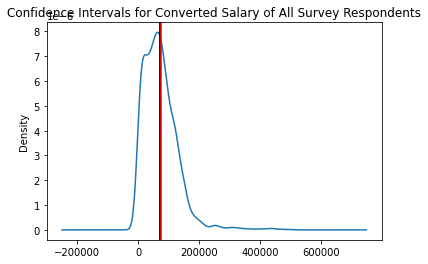

In [36]:
# The confidence interval DOES NOT capture 95% of the data from the sample
# The confidence interval captures 95% of Sample Means 
# (potential locations for the population value)

bootcampers['ConvertedSalary'].plot.density()
plt.title('Confidence Intervals for Converted Salary of All Survey Respondents')
plt.axvline(x=CI3[0], color='red')
plt.axvline(x=CI3[1], color='black')
plt.axvline(x=CI3[2], color='red')
plt.show()

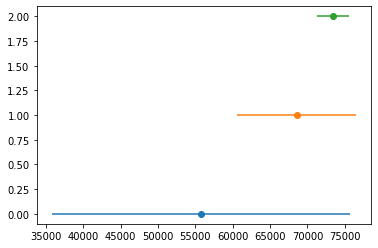

In [40]:
# plot confidence intervals - errorbar, horizontal
plt.errorbar(x=CI1[1], y=0, xerr=CI1[3], fmt='o')
plt.errorbar(x=CI2[1], y=1, xerr=CI2[3], fmt='o')
plt.errorbar(x=CI3[1], y=2, xerr=CI3[3], fmt='o')
plt.show()